In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Analyse du Dataset du titanic

In [ ]:
#Lire un fichier excel
data = pd.read_excel('../Data/titanic3.xls')

In [ ]:
#Vérifier dimensions du dataframe
print("Dimensions du dataframe:", data.shape)

In [ ]:
#Afficher le nom des colonnes
print("Noms des colonnes:", data.columns)

In [ ]:
#Afficher le début du dataframe
data.head()

In [ ]:
#Eliminer des colonnes
data = data.drop(columns=['name', 'sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data.head()

In [ ]:
#Statistiques rapides
data.describe()

Attention !  Corrompt les donées

In [ ]:
#Compléter les données manquantes par une valeur par défaut
data['age'] = data['age'].fillna(data['age'].mean())

In [ ]:
#Eliminer les lignes avec des valeurs manquantes
data = data.dropna(axis=0)
data.describe()


In [ ]:
#Compter les répétitions
data['pclass'].value_counts()
data['age'].hist()

In [ ]:
#Analyse par groupe (par leur sexe et par leur classe)
data.groupby(['sex', 'pclass']).mean()

## Dataframe et Séries

Un dataframe est formé de séries
Une série est une colonne, elle a un index(indépendant de numpy) et les données


Rappel: 

dict["key"] = value

DF["colulmn] = une série

exercice

In [30]:
data = pd.read_excel("../data/titanic3.xls")
data = data.drop(columns=['sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data = data.dropna(axis=0)

display(data["age"])
#Transforme les floats en integers
data["age"] = data["age"].astype(int)

data[data["age"]<20] = 1
data[(data["age"]>=20)&(data["age"]<30)] = 2
data[(data["age"]>=30)&(data["age"]<40)] = 3
data[data["age"]>=40] = 4

display(data["age"])
print(data["age"].value_counts())


0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1301    45.5000
1304    14.5000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1046, dtype: float64

0       2
1       1
2       1
3       3
4       2
       ..
1301    4
1304    1
1306    2
1307    2
1308    2
Name: age, Length: 1046, dtype: int64

age
2    344
4    245
3    232
1    225
Name: count, dtype: int64


Bictoin et Time series

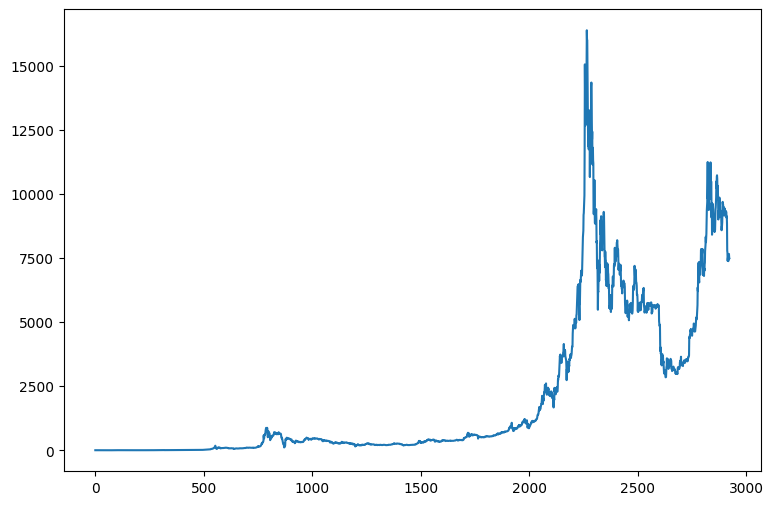

In [2]:
bitcoin = pd.read_csv("../data/BTC-EUR.csv")
#Affiche le graphique de l'évolution des closes
bitcoin['Close'].plot(figsize=(9, 6))
plt.show()

In [ ]:
#Définir le date time index(avoir un index de type datetime)
#index_col='Date' permet de définir la colonne 'Date' comme index
#parse_dates=True permet de convertir la colonne 'Date' en datetime
#Définis la colonne 'Date' comme index
bitcoin = pd.read_csv("../data/BTC-EUR.csv", index_col='Date', parse_dates=True)
bitcoin["Close"].plot(figsize=(9, 6))
#Cela montre bien que l'index est de type datetime
print(bitcoin.index)
plt.show()


On peut faire de l'indexing et du slicing sur des dates.

In [ ]:
bitcoin.head()
#Indexing du dataframe avec l'index datetime
bitcoin.loc["2019"]["Close"].plot(figsize=(9, 6))
#Sélection du mois de septembtre 2019
bitcoin.loc["2019-09"]["Close"].plot(figsize=(9, 6), color="red")#La même chose que bitcoin["2019", "Close"].plot(figsize=(9, 6))
plt.show()
#Slicing du dataframe avec l'index datetime
bitcoin.loc["2017":"2019"]["Close"].plot(figsize=(9, 6))
plt.show()

#### Functions

In [ ]:
#Resample permet de regrouper les données par période
print(bitcoin.index)
#Calcule la moyenne des closes par mois pour l'année 2019
bitcoin.loc["2019"]["Close"].resample("M").mean().plot()
bitcoin.loc["2019"]["Close"].resample("2W").mean().plot(color="red")

In [ ]:
#La fonction Aggregate(agg) permet de regrouper des statistiques par période en l'utilisant par dessus resample
stats = bitcoin.loc["2019"]["Close"].resample("W").agg(["mean", "std", "min", "max"])
stats.plot(title="Weekly Statistics of Bitcoin Close Prices in 2019")


#### Calcul d'une mooving average

In [ ]:
bitcoin.loc["2019"]["Close"].plot(figsize=(9, 6), label="Price")
#rolling permet de calculer une statistique sur une fenêtre de période glissante
bitcoin.loc["2019"]["Close"].rolling(window=7).mean().plot(color="red", label="7-Day Rolling Mean")
plt.legend()

Calcul d'une moyenne mobile exponentielle

In [ ]:
#ewm permet de calculer la moyenne mobile exponentielle
bitcoin.loc['2019']['Close'].ewm(alpha=0.2).mean().plot(color="red", label="14-Day Exponential Mean")
bitcoin.loc["2019"]["Close"].plot(label="Price")
plt.legend()

#### Assembler des datasets

In [ ]:
bitcoin = pd.read_csv("../data/BTC-EUR.csv", index_col="Date", parse_dates=True)
ethereum = pd.read_csv("../data/ETH-EUR.csv", index_col = "Date", parse_dates=True)

In [ ]:
#Assemble les deux dataframes en se basant sur la colonne 'Date', et en utilisant inner et les suffixes pour différencier les deux cryptos
btc_eth = pd.merge(bitcoin, ethereum, on="Date", how="inner", suffixes=("_BTC", "_ETH"))#inner assemble uniquement les lignes qui ont la même date dans les deux dataframes
pd.merge(bitcoin, ethereum, on="Date", how="outer", suffixes=("_BTC", "_ETH"))#outer assemble toutes les lignes des deux dataframes, même si elles n'ont pas la même date
#On met deux crochets car un seul sélectionne une série alors que deux permet de sélectionner plusieurs séries et retourne un dataframe
btc_eth[["Close_BTC", "Close_ETH"]].plot(subplots=True)
btc_eth[["Close_BTC", "Close_ETH"]].corr()

La fonction map
permet d'appliquer une fonction sur les valeurs d'une colonne

La fonction apply permet de faire de même mais sur tout le dataframe.

In [43]:
data = pd.read_excel("../data/titanic3.xls")
data = data.drop(columns=['sibsp', 'parch', 'ticket', 'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'], axis=1)
data = data.dropna(axis=0)

def category_ages (age):
    if age <= 20:
        return '<20 ans'
    elif (age >20) & (age <= 30):
        return '20-30 ans'
    elif (age > 30) & (age <= 40):
        return '30-40 ans'
    else:
        return '+40 ans'
data["age"].map(category_ages)
#Transformer une donnée de type string en integer
data["sex"].map({"male": 1, "female": 0})
#Deuxième méthode(je remplace les nombres par les mots)([éléments à remplacer], [éléments de remplacement])
data["sex"].replace([1, 0], ["male", "female"])
#Troisième méthode
# Convertir les codes de catégorie en valeurs numériques
data['sex'].astype('category').cat.codes

0       0
1       1
2       0
3       1
4       0
       ..
1301    1
1304    0
1306    1
1307    1
1308    1
Length: 1046, dtype: int8